IRIS FLOWER CLASSIFICATION

In [1]:
# import all required libaries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
irisdf = pd.read_csv("iris.csv")
#first 5 dataset
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#last 5 dataset 
irisdf.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
#description of dataset
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Dimension of data set
irisdf.shape

(150, 6)

In [6]:
irisdf.size

900

In [7]:
#check for values of each species whether its balanced or imbalanced
irisdf['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

<AxesSubplot:ylabel='Species'>

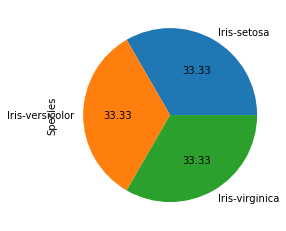

In [8]:
# Visualization in form of pie chart
irisdf['Species'].value_counts().plot(kind='pie',autopct='%.2f')

Preprocessing the data

In [9]:
#Check if any null values is present in give dataset 
irisdf.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#Check for duplicate values
duplicate_count = irisdf.duplicated().sum()
print(duplicate_count)  

0


Exploratory Data Analysis

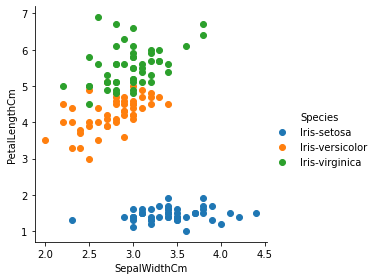

In [11]:
#Scatter Plot to  visualize the datset 
sns.FacetGrid(irisdf,hue='Species',height=4).map(plt.scatter,"SepalWidthCm" , "PetalLengthCm").add_legend()

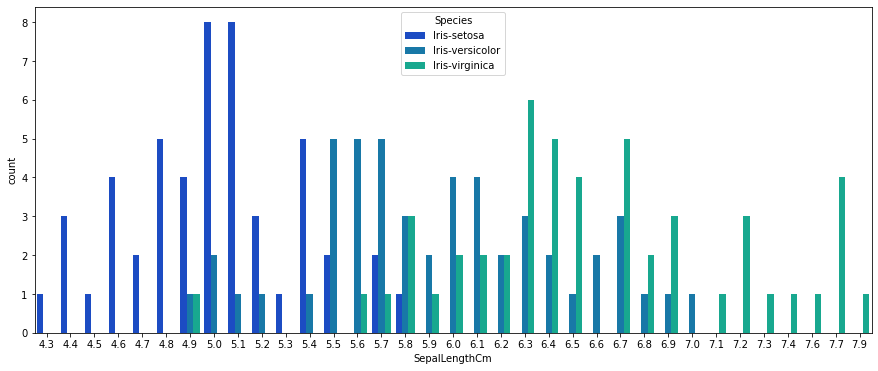

In [12]:
plt.figure(figsize =(15,6))
sns.countplot(x='SepalLengthCm', data=irisdf, hue= irisdf['Species'], palette= 'winter')
plt.show()

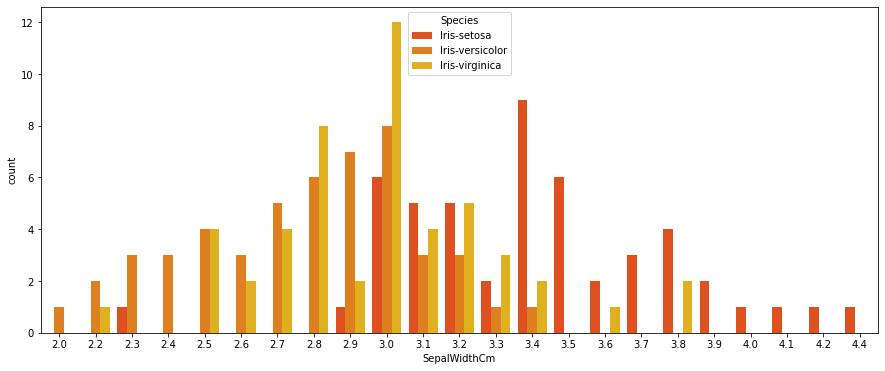

In [13]:
plt.figure(figsize =(15,6))
sns.countplot(x='SepalWidthCm', data=irisdf, hue= irisdf['Species'], palette= 'autumn')
plt.show()

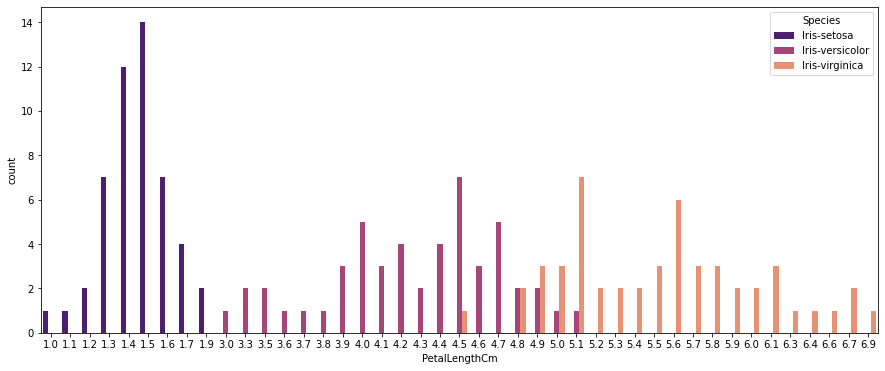

In [32]:
plt.figure(figsize =(15,6))
sns.countplot(x='PetalLengthCm', data=irisdf, hue= irisdf['Species'], palette= 'magma')
plt.show()

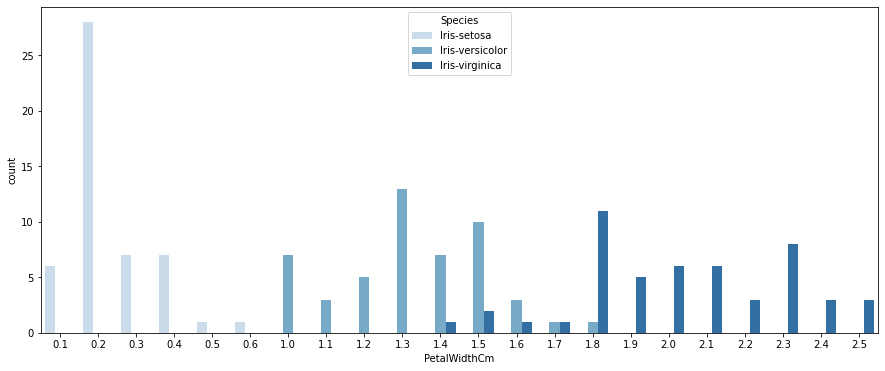

In [33]:
plt.figure(figsize =(15,6))
sns.countplot(x='PetalWidthCm', data=irisdf, hue= irisdf['Species'], palette= 'Blues')
plt.show()

In [34]:
#Coorelation matrix- if we have high correation then we can neglect one variables tht is positive correaltion i;e 0 to 1
irisdf.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

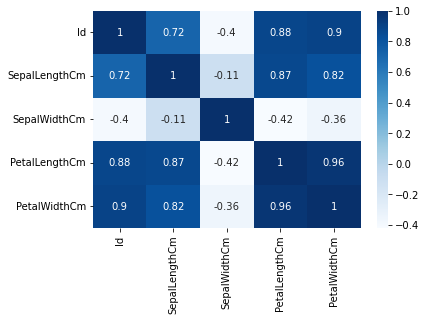

In [35]:
# Coor in form of heat map
corr = irisdf.corr()
sns.heatmap(corr,annot=True,cmap='Blues')

In [36]:
flower_mapping= {'Iris-setosa': 0, 'Iris-versicolor' : 1, 'Iris-virginica' :2}
irisdf['Species'] = irisdf ['Species'].map (flower_mapping)

In [37]:
irisdf.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [38]:
irisdf.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2
149,150,5.9,3.0,5.1,1.8,2


In [39]:
x=irisdf[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']].values
y=irisdf[['Species']].values

In [42]:
expected = y
predicted = model.predict(x)
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [43]:
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.94      0.96        50
           2       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



In [44]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]
